In [1]:
import glob
import string
import jsonlines
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from Models import *

In [2]:
fs = glob.glob(data_dir + wiki_dir + "*.jsonl")

In [3]:
rem_punct("From 1985―2015 Coster-Waldau")  # Retrieval tokenisation

'From 1985 2015 CosterWaldau'

In [4]:
claims, claims_vocab = load_claims()  # Load the 10 test samples
N_claims = len(claims)
print(N_claims, [c["id"] for c in claims])

10 [75397, 150448, 214861, 156709, 129629, 33078, 6744, 226034, 40190, 76253]


In [5]:
# Load documents as term frequencies and total word counts
tfs, wiki, n_t = load_docs(fs, claims_vocab, load_tf=True)
save_ld((tfs, wiki, n_t), "loaded_docs_10c")

48228 , 0 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 506 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 48228 out of 48228 | elapsed:    4.4s finished


48178 , 1 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16320 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 48178 out of 48178 | elapsed:    3.9s finished


48973 , 2 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 20656 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 48973 out of 48973 | elapsed:    4.9s finished


49174 , 3 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17616 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49174 out of 49174 | elapsed:    4.6s finished


49578 , 4 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18288 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49578 out of 49578 | elapsed:    4.5s finished


49719 , 5 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15456 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 49719 out of 49719 | elapsed:    4.4s finished


49849 , 6 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18336 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49849 out of 49849 | elapsed:    4.7s finished


49948 , 7 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15840 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49948 out of 49948 | elapsed:    4.6s finished


49933 , 8 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17504 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49933 out of 49933 | elapsed:    4.9s finished


49920 , 9 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15840 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49920 out of 49920 | elapsed:    5.4s finished


49928 , 10 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17376 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49928 out of 49928 | elapsed:    4.9s finished


49904 , 11 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14032 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 49904 out of 49904 | elapsed:    4.5s finished


49921 , 12 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17504 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49921 out of 49921 | elapsed:    4.5s finished


49930 , 13 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17376 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49930 out of 49930 | elapsed:    4.9s finished


49923 , 14 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15472 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49923 out of 49923 | elapsed:    5.2s finished


49928 , 15 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14544 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 49928 out of 49928 | elapsed:    4.8s finished


49936 , 16 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18000 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49936 out of 49936 | elapsed:    5.0s finished


49954 , 17 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17376 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49954 out of 49954 | elapsed:    4.7s finished


49923 , 18 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16144 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49923 out of 49923 | elapsed:    5.2s finished


49931 , 19 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16992 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49931 out of 49931 | elapsed:    4.7s finished


49939 , 20 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17376 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49939 out of 49939 | elapsed:    4.9s finished


49931 , 21 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49931 out of 49931 | elapsed:    5.2s finished


49883 , 22 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15840 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 49883 out of 49883 | elapsed:    6.2s finished


49887 , 23 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15808 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49887 out of 49887 | elapsed:    5.0s finished


49904 , 24 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16752 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49904 out of 49904 | elapsed:    5.2s finished


49919 , 25 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18208 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49919 out of 49919 | elapsed:    4.9s finished


49894 , 26 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15472 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 49894 out of 49894 | elapsed:    6.4s finished


49905 , 27 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12208 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 49905 out of 49905 | elapsed:    8.2s finished


49912 , 28 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16752 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 49912 out of 49912 | elapsed:    6.4s finished


49931 , 29 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13728 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49931 out of 49931 | elapsed:    6.2s finished


49928 , 30 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15360 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49928 out of 49928 | elapsed:    5.9s finished


49899 , 31 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14752 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49899 out of 49899 | elapsed:    5.7s finished


49890 , 32 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12576 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49890 out of 49890 | elapsed:    6.2s finished


49877 , 33 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15072 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49877 out of 49877 | elapsed:    6.0s finished


49893 , 34 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14544 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49893 out of 49893 | elapsed:    5.6s finished


49903 , 35 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14912 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49903 out of 49903 | elapsed:    5.8s finished


49915 , 36 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17232 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 49915 out of 49915 | elapsed:    6.2s finished


49938 , 37 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16272 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49938 out of 49938 | elapsed:    5.7s finished


49936 , 38 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17536 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 49936 out of 49936 | elapsed:    5.6s finished


49915 , 39 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16528 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49915 out of 49915 | elapsed:    5.9s finished


49925 , 40 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16368 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49925 out of 49925 | elapsed:    5.5s finished


49898 , 41 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14304 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49898 out of 49898 | elapsed:    5.5s finished


49896 , 42 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18000 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49896 out of 49896 | elapsed:    5.5s finished


49896 , 43 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14496 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49896 out of 49896 | elapsed:    5.6s finished


49860 , 44 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13648 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49860 out of 49860 | elapsed:    6.2s finished


49874 , 45 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13744 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49874 out of 49874 | elapsed:    5.9s finished


49894 , 46 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17344 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 49894 out of 49894 | elapsed:    7.2s finished


49897 , 47 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12336 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49897 out of 49897 | elapsed:    6.3s finished


49957 , 48 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14160 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49957 out of 49957 | elapsed:    5.8s finished


49954 , 49 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13152 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49954 out of 49954 | elapsed:    6.1s finished


49926 , 50 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15264 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49926 out of 49926 | elapsed:    6.4s finished


49931 , 51 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15360 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49931 out of 49931 | elapsed:    5.8s finished


49941 , 52 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14928 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49941 out of 49941 | elapsed:    5.4s finished


49958 , 53 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13104 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 49958 out of 49958 | elapsed:    5.1s finished


49948 , 54 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18624 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 49948 out of 49948 | elapsed:    6.2s finished


49944 , 55 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14544 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 49944 out of 49944 | elapsed:    5.2s finished


49630 , 56 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15840 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49630 out of 49630 | elapsed:    6.0s finished


49441 , 57 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17616 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 49441 out of 49441 | elapsed:    6.1s finished


48725 , 58 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14544 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 48725 out of 48725 | elapsed:    6.2s finished


47872 , 59 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14544 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 47872 out of 47872 | elapsed:    7.1s finished


48586 , 60 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 10512 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 48586 out of 48586 | elapsed:    6.1s finished


49926 , 61 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17344 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 49926 out of 49926 | elapsed:    5.6s finished


49896 , 62 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49896 out of 49896 | elapsed:    5.4s finished


49710 , 63 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16528 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49710 out of 49710 | elapsed:    5.7s finished


49696 , 64 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13152 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 49696 out of 49696 | elapsed:    6.5s finished


49936 , 65 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18960 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 49936 out of 49936 | elapsed:    5.7s finished


49925 , 66 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14832 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49925 out of 49925 | elapsed:    5.7s finished


49924 , 67 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 19984 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 49924 out of 49924 | elapsed:    5.5s finished


49920 , 68 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15840 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49920 out of 49920 | elapsed:    5.4s finished


49896 , 69 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12816 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 40840 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done 49896 out of 49896 | elapsed:    6.7s finished


49896 , 70 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14448 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49896 out of 49896 | elapsed:    5.8s finished


49865 , 71 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15840 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49865 out of 49865 | elapsed:    6.2s finished


49888 , 72 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12528 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 49888 out of 49888 | elapsed:    5.5s finished


49876 , 73 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 8688 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 38208 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 49876 out of 49876 | elapsed:    6.7s finished


49928 , 74 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12624 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 49928 out of 49928 | elapsed:    8.3s finished


49938 , 75 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12816 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 49938 out of 49938 | elapsed:    7.7s finished


49953 , 76 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14352 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 49953 out of 49953 | elapsed:    8.3s finished


49905 , 77 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15360 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 49905 out of 49905 | elapsed:    8.8s finished


49917 , 78 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16880 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 49917 out of 49917 | elapsed:    8.3s finished


49912 , 79 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16320 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 49912 out of 49912 | elapsed:    8.9s finished


49923 , 80 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 2264 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 35528 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done 49923 out of 49923 | elapsed:   10.5s finished


49904 , 81 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12682 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 37522 tasks      | elapsed:    5.9s
[Parallel(n_jobs=8)]: Done 49904 out of 49904 | elapsed:    7.3s finished


49937 , 82 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49937 out of 49937 | elapsed:    6.2s finished


49949 , 83 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 18288 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 49949 out of 49949 | elapsed:    5.7s finished


49944 , 84 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14832 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49944 out of 49944 | elapsed:    5.7s finished


49937 , 85 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14912 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 49937 out of 49937 | elapsed:    8.1s finished


49917 , 86 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17232 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 49917 out of 49917 | elapsed:    7.7s finished


49905 , 87 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 19216 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 49905 out of 49905 | elapsed:    5.3s finished


49899 , 88 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 20064 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 49899 out of 49899 | elapsed:    7.0s finished


49921 , 89 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14688 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49921 out of 49921 | elapsed:    7.7s finished


49901 , 90 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15456 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49901 out of 49901 | elapsed:    7.9s finished


49938 , 91 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14352 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49938 out of 49938 | elapsed:    8.2s finished


49914 , 92 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16272 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 49914 out of 49914 | elapsed:    6.3s finished


49903 , 93 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 17328 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49903 out of 49903 | elapsed:    5.4s finished


49874 , 94 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 19968 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 49874 out of 49874 | elapsed:    5.4s finished


49925 , 95 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14688 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49925 out of 49925 | elapsed:    5.7s finished


49936 , 96 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 12864 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 49936 out of 49936 | elapsed:    5.7s finished


49910 , 97 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16528 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49910 out of 49910 | elapsed:    5.6s finished


49885 , 98 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 14352 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49885 out of 49885 | elapsed:    5.5s finished


49908 , 99 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 19488 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 49908 out of 49908 | elapsed:    5.7s finished


49907 , 100 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 49907 out of 49907 | elapsed:    5.8s finished


49906 , 101 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15072 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 49906 out of 49906 | elapsed:    5.9s finished


49921 , 102 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15024 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49921 out of 49921 | elapsed:    6.9s finished


49946 , 103 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16912 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49946 out of 49946 | elapsed:    5.4s finished


49932 , 104 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15808 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 49932 out of 49932 | elapsed:    5.9s finished


49916 , 105 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 13728 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 49916 out of 49916 | elapsed:    6.0s finished


49944 , 106 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 15840 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 49944 out of 49944 | elapsed:    4.8s finished


49944 , 107 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 23328 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 49944 out of 49944 | elapsed:    4.9s finished


16523 , 108 / 109


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 16523 out of 16523 | elapsed:    2.6s finished


In [5]:
tfs, wiki, n_t = load_ld("loaded_docs_10c")

In [6]:
D_ids = list(wiki.keys())
tdist = sorted([(a, b) for (b, a) in list(tfs.items())])[::-1]
y = [t[0] for t in tdist]
N_docs = len(wiki)
N = len(y)
mean_doc_len = np.mean([wiki[id_][1] for id_ in wiki])
words_total = sum(tfs.values())
c_M = {w: tfs[w] / words_total for w in tfs}
N_docs, N, mean_doc_len, words_total, c_M["the"], c_M["of"]

(5396101,
 5174471,
 117.62701346768714,
 634727245,
 0.0421404882344384,
 0.03353797267675188)

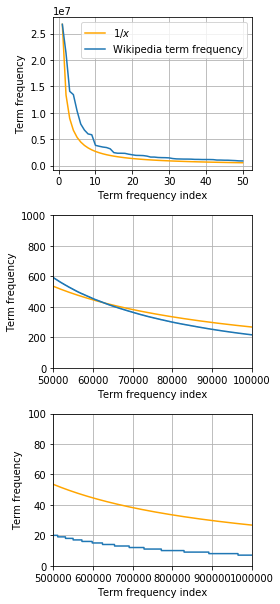

In [109]:
fig = plt.figure()
fig.set_size_inches(4, 8.5)
fig.add_subplot(3, 1, 1)
n_plot = 50
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
fig.add_subplot(3, 1, 2)
n_plot = 100000
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.xlim(50000, 100000)
plt.ylim(0, 0.0001* 1e7)
plt.tight_layout()
fig.add_subplot(3, 1, 3)
n_plot = 1000000
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.xlim(500000, 1000000)
plt.ylim(0, 0.00001* 1e7)
plt.tight_layout()
plt.savefig("graphs/zipf.pdf", filetype="pdf")
plt.show()

In [188]:
# Compute a quick estimate of the Zipf parameters using the averages of the top 100000 words
offs = 0
n_use = 10000
k = np.mean([i * y[:n_use][i - offs] for i in range(n_use)])
y_sum_ = sum(y[:n_use])
c = np.mean([i * y[:n_use][i - offs] / y_sum_ for i in range(n_use)])
c_std = np.std([i * y[:n_use][i - offs] / y_sum_ for i in range(n_use)])
s = 1 - (np.log(c) / np.log(y_sum_ / n_use))
print("Zipf parameters k, c, s =")
k, c, s, c_std

Zipf parameters k, c, s =


(64491073.1515, 0.125908795208139, 1.1910934752538926, 0.012826773168058874)

In [189]:
fit_y = [k * (1 / (x_ ** s)) for x_ in x]
reciprocal_y = [y[0] * (1 / x_) for x_ in x]

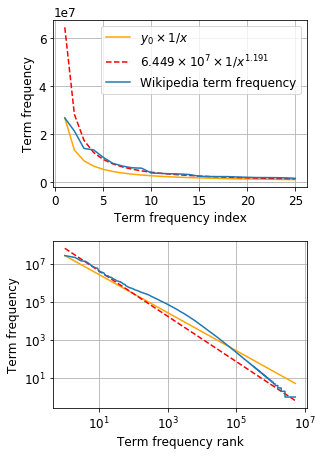

In [190]:
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.figure()
fig.set_size_inches(4.65, 6.5)
fig.add_subplot(2, 1, 1)
n_plot = 25
x = range(1, n_plot + 1)
plt.plot(x, reciprocal_y[:n_plot], label='$y_0 \\times 1/x$', color="orange")
plt.plot(x, fit_y[:n_plot], label='$' + str(round(k/10**7, 3)) + ' \\times 10^7 \\times 1/x^{' + str(round(s, 3)) + '}$', \
         color="red", ls='--')
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
fig.add_subplot(2, 1, 2)
x = range(1, len(y) + 1)
plt.plot(x, reciprocal_y, color="orange")
plt.plot(x, fit_y, color="red", ls='--')
plt.plot(x, y, label="Wikipedia term frequency")
plt.xlabel("Term frequency rank")
plt.ylabel("Term frequency")
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig("graphs/zipf.pdf", filetype="pdf")
plt.show()

In [191]:
# Compute a more exact solution using maximum likelihood estimation, starting from the initial estimate
N = len(y)
x = np.asarray(range(1, len(y) + 1))
y_sum = sum(y)
p = np.asarray(y) / y_sum
zipf_lp = lambda rs, s: (-s * np.log(rs)) - np.log(np.sum(1 / (rs ** s)))
cost = lambda s: np.sum((np.log(p) - zipf_lp(x, s)) ** 2)
res = minimize(cost, s, bounds=[(0.1, 10.0)])
res

      fun: 475759.2508229877
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.04656613])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 5
   status: 0
  success: True
        x: array([1.22262674])

In [132]:
s_mle = res["x"][0]
c = np.mean(x * (1 / x ** s_mle))
c_std = np.std(x * (1 / x ** s_mle))
k_mle = c * y_sum
print("Zipf parameters k, c, s =")
k_mle, c, s_mle, c_std

Zipf parameters k, c, s =


(26137851.866030946,
 0.041179659565473585,
 1.222626744180416,
 0.012299299485549644)

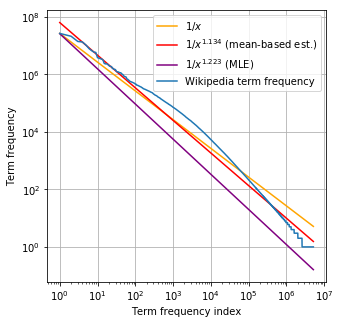

In [133]:
fig = plt.figure()
fig.set_size_inches(5, 5)
n_plot = len(y)
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, [k * (1 / (x_ ** s)) for x_ in x], label='1/$x^{' + str(round(s, 3)) + '}$ (mean-based est.)', color="red")
plt.plot(x, [k_mle * (1 / (x_ ** s_mle)) for x_ in x], label='1/$x^{' + str(round(s_mle, 3)) + '}$ (MLE)', color="purple")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
plt.xscale('log')
plt.yscale('log')

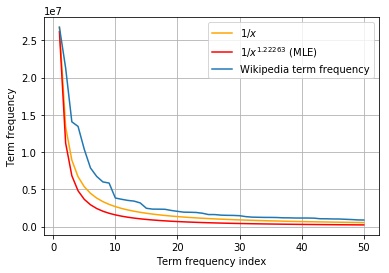

In [93]:
# Replot Zipf graph
n_plot = 50
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, [k * (1 / (x_ ** s)) for x_ in x], label='1/$x^{' + str(round(s, 5)) + '}$ (MLE)', color="red")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
plt.savefig("graphs/zipf.pdf", filetype="pdf")
# plt.xlim(50000, 100000)
# plt.ylim(0, 0.0001* 1e7)
plt.show()

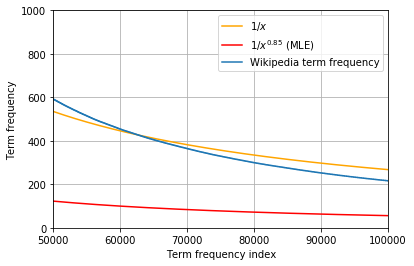

In [90]:
# Replot Zipf graph
n_plot = 100000
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, [k * (1 / (x_ ** 1.134)) for x_ in x], label='1/$x^{' + str(round(0.85, 3)) + '}$ (MLE)', color="red")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
plt.savefig("graphs/zipf.pdf", filetype="pdf")
plt.xlim(50000, 100000)
plt.ylim(0, 0.0001* 1e7)
plt.show()

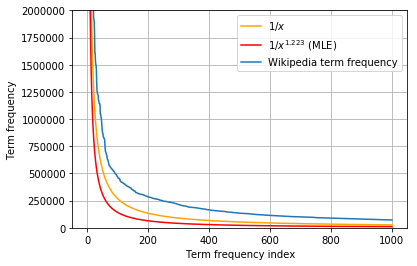

In [73]:
# Replot Zipf graph
n_plot = 1000
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, [k * (1 / (x_ ** 1.134)) for x_ in x], label='1/$x^{' + str(round(s, 3)) + '}$ (MLE)', color="red")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
plt.savefig("graphs/zipf.pdf", filetype="pdf")
plt.ylim(0, 0.2* 1e7)
plt.show()

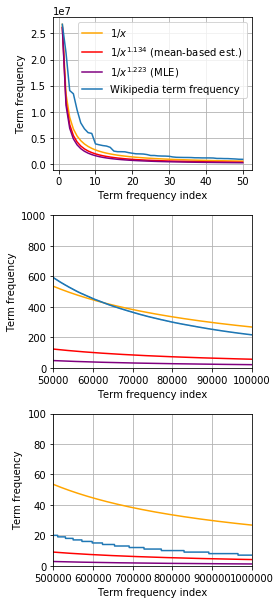

In [116]:
fig = plt.figure()
fig.set_size_inches(4, 8.5)
fig.add_subplot(3, 1, 1)
n_plot = 50
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, [k * (1 / (x_ ** 1.134)) for x_ in x], label='1/$x^{' + str(round(1.134, 3)) + '}$ (mean-based est.)', color="red")
plt.plot(x, [k * (1 / (x_ ** s)) for x_ in x], label='1/$x^{' + str(round(s, 3)) + '}$ (MLE)', color="purple")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
fig.add_subplot(3, 1, 2)
n_plot = 100000
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, [k * (1 / (x_ ** 1.134)) for x_ in x], label='1/$x^{' + str(round(1.134, 3)) + '}$ (mean-based est.)', color="red")
plt.plot(x, [k * (1 / (x_ ** s)) for x_ in x], label='1/$x^{' + str(round(s, 3)) + '}$ (MLE)', color="purple")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.xlim(50000, 100000)
plt.ylim(0, 0.0001* 1e7)
plt.tight_layout()
fig.add_subplot(3, 1, 3)
n_plot = 1000000
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, [k * (1 / (x_ ** 1.134)) for x_ in x], label='1/$x^{' + str(round(1.134, 3)) + '}$ (mean-based est.)', color="red")
plt.plot(x, [k * (1 / (x_ ** s)) for x_ in x], label='1/$x^{' + str(round(s, 3)) + '}$ (MLE)', color="purple")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.xlim(500000, 1000000)
plt.ylim(0, 0.00001* 1e7)
plt.tight_layout()
plt.savefig("graphs/zipf.pdf", filetype="pdf")
plt.show()

In [11]:
# Adjust variables to implement smooth IDF and smoothed Jelinik-Mercer/Dirichlet smoothing (assume that words found only in
# the query claim, and not in the wikipedia pages, occur once in the wikipedia pages, in one existing new document)
changed = False
for w in claims_vocab:
    if w not in n_t:
        n_t[w] = 0
        tfs[w] = 1
        N += 1
        changed = True
if changed:
    words_total = sum(tfs.values())
    c_M = {w: tfs[w] / words_total for w in tfs}

In [45]:
# Define document models
smooth_idf_e_tfidf = 0.5
def log_func_tfidf(w):
    return np.log(N_docs / (n_t[w] + smooth_idf_e_tfidf))
#     return np.log(N_docs / (n_t[w] + smooth_idf_e_tfidf)) + smooth_idf_e_tfidf
#     return np.log((N_docs + smooth_idf_e_tfidf) / (n_t[w] + smooth_idf_e_tfidf))
#     return np.log((N_docs + smooth_idf_e) / max(n_t[w], smooth_idf_e))
#     return np.log(N_docs / n_t[w]) if n_t[w] >= 1 else 0
log_cvoc_tfidf = {w: log_func_tfidf(w) for w in claims_vocab}
# log_fun_tfidf = lambda x: log_cvoc_tfidf[w] if w in log_cvoc_tfidf else log_func_tfidf(w)
smooth_idf_e = 0.5
def log_func(w):
#     return np.log(N_docs / (n_t[w] + smooth_idf_e))
#     return np.log(N_docs / (n_t[w] + smooth_idf_e)) + smooth_idf_e
    return np.log((N_docs + smooth_idf_e) / (n_t[w] + smooth_idf_e))
#     return np.log((N_docs + smooth_idf_e) / max(n_t[w], smooth_idf_e))
log_cvoc = {w: log_func(w) for w in claims_vocab}
# log_fun = lambda x: log_cvoc[w] if w in log_cvoc else log_func(w)
def tf_idf(doc_tf, total, claims_=[]):
    doc_tfidf = {w: ( doc_tf[w] * log_cvoc_tfidf[w] ) for w in doc_tf if w in claims_vocab}
    return [np.sum([doc_tfidf[w] for w in claim["vocab"] if w in doc_tf]) for claim in claims_]
def unsmoothed_ll(doc_tf, total, claims_=[]):
    doc_M = {w: ( doc_tf[w] / total ) for w in doc_tf if w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"] if w in doc_tf])) if any([
        w in doc_tf for w in claim["vocab"]]) else -np.inf for claim in claims_]
count_cap = 15
def lidstone_ll(doc_tf, total, epsilon=0.05, claims_=[]):
#     total = len(doc_tf)
    total = sum([min(count_cap, doc_tf[w]) for w in doc_tf])
    e_N = total + (epsilon * N)
    zero_count_prob = epsilon / e_N
#     doc_M = {w: ( (1.0 + epsilon) / e_N ) for w in doc_tf if w in claims_vocab}
    doc_M = {w: ( (min(count_cap, doc_tf[w]) + epsilon) / e_N ) for w in doc_tf if w in claims_vocab}
#     doc_M = {w: ( (doc_tf[w] + epsilon) / e_N ) for w in doc_tf if w in claims_vocab}
    return [np.sum(np.log([(doc_M[w] if w in doc_tf else zero_count_prob) for w in claim["vocab"]])) for claim in claims_]
def lidstone_jm_ll(doc_tf, total, epsilon=0.05, lambda_=0.9, foo={}, claims_=[]):
    e_N = total + (epsilon * N)
    zero_count_prob = epsilon / e_N
    doc_M = {w: ( (doc_tf[w] + epsilon) / e_N ) for w in doc_tf if w in claims_vocab}
#     doc_M = {w: ( (lambda_ * (doc_M[w] if w in doc_M else zero_count_prob) / total) + foo[w] ) for w in claims_vocab}
    doc_M = {w: ( (lambda_ * (doc_M[w] if w in doc_M else 0) / total) + \
                  (foo[w] * (zero_count_prob if w not in doc_M else 1)) ) for w in claims_vocab}
#     doc_M = {w: ( (lambda_ * (doc_M[w] if w in doc_M else zero_count_prob) / total) + \
#                   (foo[w] * (zero_count_prob if w not in doc_M else 1)) ) for w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
def laplace_ll(*as_, **ps):
    ps["epsilon"] = 1.0
    return lidstone_ll(*as_, **ps)
def lidstone_ll_exp(doc_tf, total, epsilon=0.05, claims_=[]):
    e_N = total + (epsilon * N)
    zero_count_prob = epsilon / e_N
    doc_M = {w: ( (doc_tf[w] + epsilon) / e_N ) for w in doc_tf if w in claims_vocab}
    return [np.sum([(doc_M[w] if w in doc_tf else zero_count_prob) for w in claim["vocab"]]) for claim in claims_]
def lidstone_ll_idf(doc_tf, total, query_idf=True, doc_idf=True, epsilon=0.05, claims_=[]):
    e_N = total + (epsilon * N)
    doc_M = {w: ( ((doc_tf[w] if w in doc_tf else 0) + epsilon) * \
            (log_cvoc[w] if ((w in doc_tf and doc_idf) or (w not in doc_tf and query_idf)) else 1) / e_N ) for w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
# def lidstone_ll(doc_tf, total, epsilon=0.05):
#     doc_M = {w: ( (doc_tf[w] + epsilon) / (total + (epsilon * N)) ) for w in claims_vocab}
#     return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
# def lidstone_ll_idf(doc_tf, total, epsilon=0.05):
#     doc_M = {w: ( (doc_tf[w] + epsilon) * \
#                  (log_cvoc[w]) / (total + (epsilon * N)) ) for w in claims_vocab}
#     return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
def create_jm_ll_foo(lambda_):
    return {w: ((1 - lambda_) * c_M[w]) for w in claims_vocab}
def jm_ll(doc_tf, total, lambda_=0.9, foo={}, claims_=[]):
    doc_M = {w: ( (lambda_ * (doc_tf[w] if w in doc_tf else 0) / total) + foo[w] ) for w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
def create_jm_ll_idf_foo(lambda_):
    return {w: (log_cvoc[w] * lambda_) for w in claims_vocab}, \
           {w: (log_cvoc[w] * ((1 - lambda_) * c_M[w])) for w in claims_vocab}
def jm_ll_idf(doc_tf, total, foo={}, claims_=[]):
    jm_ins_1, jm_ins_2 = foo
    doc_M = {w: ( (jm_ins_1[w] * (doc_tf[w] if w in doc_tf else 0) / total) + jm_ins_2[w] ) for w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
def dirichlet_ll(doc_tf, total, mu=mean_doc_len, claims_=[]):
#     total = sum([min(count_cap, doc_tf[w]) for w in doc_tf])
    doc_M_weight = (total / (total + mu))
    c_M_weight   = (mu    / (total + mu))
    doc_M = {w: ( (doc_M_weight * (doc_tf[w] if w in doc_tf else 0) / total) + \
                    (c_M_weight * c_M[w]) ) for w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
N_occ = words_total
def dirichlet_lidstone_ll(doc_tf, total, mu=mean_doc_len, epsilon=0.05, claims_=[]):
#     total = sum([min(count_cap, doc_tf[w]) for w in doc_tf])
    e_N = total + (epsilon * N)
#     zero_count_prob = epsilon / e_N
#     doc_M = {w: ( ((total / (total + mu)) * ((doc_tf[w] + epsilon) if w in doc_tf else 0) / e_N) + \
#     doc_M = {w: ( ((total / (total + mu)) * (doc_tf[w] if w in doc_tf else 0) / total) + \
    doc_M = {w: ( ((total / (total + mu)) * ((doc_tf[w] if w in doc_tf else 0) + epsilon) / e_N) + \
                  ((mu    / (total + mu)) * c_M[w]) ) for w in claims_vocab}
#                   ((mu    / (total + mu)) * (((c_M[w] * N_occ) + epsilon) / (N_occ + (epsilon * N)))) ) for w in claims_vocab}
#                   ((mu    / (total + mu)) * (c_M[w] + (zero_count_prob if w not in doc_tf else 0))) ) for w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
def dirichlet_ll_idf(doc_tf, total, mu=mean_doc_len, claims_=[]):
    doc_M = {w: ( (((total / (total + mu)) * (doc_tf[w] if w in doc_tf else 0) / total) + \
                   ((mu / (total + mu)) * c_M[w])) * log_cvoc[w] ) for w in claims_vocab}
    return [np.sum(np.log([doc_M[w] for w in claim["vocab"]])) for claim in claims_]
def eval_model(sim_func, **ps):
    batch_size = 10000
    D_batches = [D_ids[i * batch_size:(i + 1) * batch_size] for i in range((N_docs // batch_size) + 1)]
    print("Computing similarities (" + str(len(D_ids)) + " in " + str(len(D_batches)) + " batches)...")
    similarities = sum(joblib.Parallel(n_jobs=n_cpu, verbose=5)(delayed(batch_sims)(
        [wiki[doc_id] for doc_id in D_batch], sim_func, **ps) for D_batch in D_batches), [])
    sys_print("Ranking documents...")
    top_docs = []
    for i in range(N_claims):
        sims = np.asarray([similarities[j][i] for j in range(N_docs)])
        ord_ = np.argsort(sims)
        top_docs.append([D_ids[j] for j in ord_[-1000:]])
        sys_print("\rRanking documents... " + str(i + 1) + '/' + str(N_claims) + ' ')
    print("Evaluating accuracy...")
    res = eval_acc(top_docs)
    return res, top_docs

In [12]:
claims

[{'id': 75397,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
  'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
    [92206, 104971, 'Fox_Broadcasting_Company', 0]]],
  'vocab': {'Nikolaj': 1,
   'CosterWaldau': 1,
   'worked': 1,
   'with': 1,
   'the': 1,
   'Fox': 1,
   'Broadcasting': 1,
   'Company': 1}},
 {'id': 150448,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Roman Atwood is a content creator.',
  'evidence': [[[174271, 187498, 'Roman_Atwood', 1]],
   [[174271, 187499, 'Roman_Atwood', 3]]],
  'vocab': {'Roman': 1,
   'Atwood': 1,
   'is': 1,
   'a': 1,
   'content': 1,
   'creator': 1}},
 {'id': 214861,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'History of art includes architecture, dance, sculpture, music, painting, poetry literature, theatre, narrative, film, photography and graphic arts.',
  'evidence': [[[255136, 254645, 'History_of_art'

In [13]:
# Evaluate TF-IDF retrieval
recall, top_docs = eval_model(tf_idf, claims_=claims)
print(recall)
pr(top_docs)

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   12.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   32.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.0min finished


Ranking documents...
10Evaluating accuracy...
0.1
0.1
[   [   (538.9047849471724, 'Timeline_of_Class_I_railroads_-LRB-1930–76-RRB-'),
        (585.2736152764571, 'List_of_OMIM_disorder_codes'),
        (719.0892876340262, 'List_of_New_Jersey_street_railroads'),
        (   731.8164202842529,
            'List_of_early_British_private_locomotive_manufacturers'),
        (1170.0539956279601, 'Mottos_and_halls_of_the_Livery_Companies')],
    [   (240.45713028928213, 'History_of_the_Roman_Constitution'),
        (248.72120298138088, 'List_of_New_Zealand_religious_leaders'),
        (322.4035862047103, 'List_of_New_Zealand_Catholic_bishops'),
        (330.88251923058965, 'List_of_Catholic_schools_in_New_York'),
        (665.0751920139902, 'History_of_Rome_-LRB-disambiguation-RRB-')],
    [   (532.1430476965566, 'Australian_performance_poetry'),
        (533.0483537165627, 'South_Asian_literature'),
        (629.7843629209235, 'Street_dance'),
        (973.4336164380805, 'Western_literature'

In [14]:
# Evaluate unsmoothed probabilistic retrieval
recall, top_docs = eval_model(unsmoothed_ll, claims_=claims)
print(recall)
pr(top_docs)

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   11.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   34.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.0min finished


Ranking documents...
10Evaluating accuracy...
0.0
0.0
[   [   (   -1.3121863889661687,
            'International_rankings_of_the_Republic_of_the_Congo'),
        (-1.252762968495368, 'Neroli_Meadows'),
        (-1.252762968495368, 'Shakespeare_Company'),
        (-1.252762968495368, "That's_the_way_the_cookie_crumbles"),
        (-1.2039728043259361, 'In_the_Morning')],
    [   (-1.4469189829363254, '1st_century_in_Roman_Britain'),
        (-1.4469189829363254, '2nd_century_in_Roman_Britain'),
        (-1.4469189829363254, '3rd_century_in_Roman_Britain'),
        (-1.4469189829363254, '4th_century_in_Roman_Britain'),
        (-1.4271163556401458, 'Roman_food')],
    [   (   -0.8754687373538999,
            'List_of_Presidents_of_the_Landtag_of_Württemberg-Baden'),
        (-0.8754687373538999, 'List_of_Presidents_of_the_Senate_of_Zimbabwe'),
        (-0.6931471805599453, 'List_of_airlines_of_Paraguay'),
        (-0.6931471805599453, 'List_of_romantics'),
        (-0.6931471805599453, 

In [15]:
# Evaluate Laplace retrieval
recall, top_docs = eval_model(laplace_ll, claims_=claims)
print(recall)
pr(top_docs)

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   13.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   33.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.2min finished


Ranking documents...
10Evaluating accuracy...
0.3
0.3
[   [   (-110.82864184453629, 'KIT_-LRB-AM-RRB-'),
        (-110.72591536379808, 'List_of_castles_in_the_United_States'),
        (-110.54993637565225, 'Joel_Cheatwood'),
        (-110.5025691903893, 'Albie_Thoms'),
        (   -110.07198888634281,
            'Timeline_of_Class_I_railroads_-LRB-1977–present-RRB-')],
    [   (-82.91919087116986, 'List_of_This_Is_Daniel_Cook_episodes'),
        (-82.77645399293246, 'List_of_essential_oils'),
        (-82.64300454695713, "Timeline_of_women's_ordination"),
        (-80.89810886405449, 'List_of_video_game_crowdfunding_projects'),
        (-79.20771758654372, 'List_of_Latin_legal_terms')],
    [   (-254.95053454053965, 'Narrative'),
        (-253.48700827446032, 'Fine_art'),
        (-253.21142689930832, 'List_of_video_game_crowdfunding_projects'),
        (-250.78141182982424, 'Acropolis_Institute_of_Technology_and_Research'),
        (-246.38074053355365, 'History_of_art')],
    [   ( 

In [18]:
# Evaluate Lidstone smoothing (find an approximation to the best value of epsilon)
res = [eval_model(lidstone_ll, epsilon=e, claims_=claims) for e in [0.0005, 0.001, 0.005, 0.01, 0.03]]
accs = [r[0] for r in res]
print(accs)
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   15.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   37.9s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.6min finished


Ranking documents...
10Evaluating accuracy...
0.65 0.5833333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   15.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   42.4s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.5min finished


Ranking documents...
10Evaluating accuracy...
0.65 0.5833333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   16.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   41.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.5min finished


Ranking documents...
10Evaluating accuracy...
0.65 0.5833333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   19.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   43.5s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.6min finished


Ranking documents...
10Evaluating accuracy...
0.65 0.5833333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   20.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   44.7s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.6min finished


Ranking documents...
10Evaluating accuracy...
0.75 0.6666666666666666
[0.65, 0.65, 0.65, 0.65, 0.75]
Top:  4 , 0.75
0.6666666666666666


In [21]:
# Evaluate Lidstone smoothing (find an approximation to the best value of epsilon)
res = [eval_model(lidstone_ll, epsilon=e, claims_=claims) for e in [0.05, 0.08, 0.12, 0.15]]
accs = [r[0] for r in res]
print(accs)
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

[0.75, 0.75, 0.75, 0.75]
Top:  0 , 0.75
[   [   'Peter_Liguori',
        'Peter_Windsor',
        'Jimmy_Hodson',
        "List_of_Bob's_Burgers_episodes",
        'Joel_Cheatwood'],
    [   'List_of_Latin_legal_terms',
        'Stack_Overflow',
        'List_of_essential_oils',
        'Giancarlo_Volpe',
        'List_of_video_game_crowdfunding_projects'],
    [   'The_arts',
        'Acropolis_Institute_of_Technology_and_Research',
        'Narrative',
        'Fine_art',
        'History_of_art'],
    [   'Loni_Love',
        'Jeannie_Mai',
        'Roy_"Royalty"_Hamilton',
        'Tamar_Braxton',
        'Adrienne_Bailon'],
    [   'Rodina_-LRB-TV_series-RRB-',
        'List_of_fictional_anthropologists',
        'Andrew_Kaplan',
        'List_of_Homeland_episodes',
        'Homeland_-LRB-TV_series-RRB-'],
    [   'Sports_in_Boston',
        "2014–15_Boston_College_Eagles_men's_ice_hockey_season",
        '1994–95_Orlando_Magic_season',
        "2013–14_Boston_College_Eagles_men's

In [46]:
# Evaluate Lidstone smoothing (find an approximation to the best value of epsilon)
res = [eval_model(lidstone_ll, epsilon=e, claims_=claims) for e in [0.05, 0.1, 0.15]]
# res = [eval_model(lidstone_ll, epsilon=e, claims_=claims) for e in [0.005, 0.01, 0.03]]
# res = [eval_model(lidstone_ll, epsilon=e, claims_=claims) for e in [0.005, 0.008, 0.01, 0.012, 0.015, 0.03]]
accs = [r[0] for r in res]
print(accs)
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   14.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   37.4s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.3min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   14.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   38.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.3min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   13.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   35.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.3min finished


Ranking documents...
10Evaluating accuracy...
0.75
[0.75, 0.75, 0.75]
Top:  0 , 0.75
[   [   'Peter_Liguori',
        'Peter_Windsor',
        'Jimmy_Hodson',
        "List_of_Bob's_Burgers_episodes",
        'Joel_Cheatwood'],
    [   'List_of_Latin_legal_terms',
        'Stack_Overflow',
        'List_of_essential_oils',
        'Giancarlo_Volpe',
        'List_of_video_game_crowdfunding_projects'],
    [   'The_arts',
        'Acropolis_Institute_of_Technology_and_Research',
        'Narrative',
        'Fine_art',
        'History_of_art'],
    [   'Loni_Love',
        'Jeannie_Mai',
        'Roy_"Royalty"_Hamilton',
        'Tamar_Braxton',
        'Adrienne_Bailon'],
    [   'Rodina_-LRB-TV_series-RRB-',
        'List_of_fictional_anthropologists',
        'Andrew_Kaplan',
        'List_of_Homeland_episodes',
        'Homeland_-LRB-TV_series-RRB-'],
    [   'Sports_in_Boston',
        "2014–15_Boston_College_Eagles_men's_ice_hockey_season",
        '1994–95_Orlando_Magic_season',

In [17]:
# Evaluate Lidstone + JM smoothing  e=[0.0001] -> 0.65, [1.0] <= e >= [0.001] & 0.1 <= l <= 0.9999 -> 0.7, e=[0.5] -> 0.6
l = 0.99
res = [eval_model(lidstone_jm_ll, epsilon=e,lambda_=l,oods=create_jm_ll_oods(l),claims_=claims) for e in [0.001/0.005/0.01/0.1/]]
accs = [r[1] for r in res]
print(accs, [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   18.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   49.1s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.9min finished


Ranking documents...
10Evaluating accuracy...
0.7 0.6666666666666666
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.4s


KeyboardInterrupt: 

In [42]:
# Evaluate Lidstone + JM smoothing
l = 0.99
res = [eval_model(lidstone_jm_ll, epsilon=e,lambda_=l,oods=create_jm_ll_oods(l),claims_=claims) for e in [0.001, 0.01, 0.1, 1.0]]
# res = [eval_model(lidstone_jm_ll, epsilon=e,lambda_=l,oods=create_jm_ll_oods(l),claims_=claims) for e in [0.0001, 0.00001]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   22.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   57.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.5min finished


Ranking documents...
10Evaluating accuracy...
0.7 0.6666666666666666
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   22.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   59.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.6min finished


Ranking documents...
10Evaluating accuracy...
0.7 0.6666666666666666
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   28.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.9min finished


Ranking documents...
10Evaluating accuracy...
0.7 0.6666666666666666
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   27.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  4.0min finished


Ranking documents...
10Evaluating accuracy...
0.7 0.6666666666666666
Accuracy for Evidence: [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666] , Claims: [0.7, 0.7, 0.7, 0.7]
Top:  0 , 0.6666666666666666
[   [   'List_of_The_Simpsons_writers',
        'Susan_Wynne',
        'List_of_Family_Guy_writers',
        'Nikolaj_Coster-Waldau',
        'New_Amsterdam_-LRB-TV_series-RRB-'],
    [   'Genre_fiction',
        'Joel_Spolsky',
        'Stacey_Roy',
        'List_of_video_game_crowdfunding_projects',
        'Giancarlo_Volpe'],
    ['The_arts', 'Porter_College', 'Narrative', 'Fine_art', 'History_of_art'],
    [   'Adrienne_Bailon',
        'Jeannie_Mai',
        'Cheetah-licious_Christmas',
        'Loni_Love',
        'Empire_Girls-COLON-_Julissa_and_Adrienne'],
    [   'Homeland_-LRB-season_2-RRB-',
        'Andrew_Kaplan',
        'Rodina_-LRB-TV_series-RRB-',
        'List_of_Homeland_episodes',
        'Homeland_-LRB-TV_series-RRB-'],
    [   'List_of

In [28]:
# Evaluate Laplace smoothing with Lidstone correction + IDF (find an approximation to the best value of epsilon)
res = [eval_model(lidstone_ll_idf, epsilon=e, claims_=claims) for e in [0.005, 0.008, 0.01, 0.012, 0.015, 0.03]]
# res = [eval_model(lidstone_ll_idf, epsilon=e, claims_=claims) for e in [0.001]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
c:\python36\lib\site-packages\joblib\externals\loky\process_executor.py:683: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   33.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  4.8min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   28.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  4.8min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   32.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  4.1min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   23.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   54.4s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.2min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   23.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   58.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.2min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   19.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   52.1s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.1min finished


Ranking documents...
10Evaluating accuracy...
0.65
[0.75, 0.75, 0.75, 0.75, 0.75, 0.65]
Top:  0 , 0.75
[   [   (-73.40732469730096, 'Point_Pleasant_-LRB-TV_series-RRB-'),
        (-72.64450803296123, 'Jimmy_Hodson'),
        (-72.54519085939673, 'Peter_Windsor'),
        (-71.93144592639347, "List_of_Bob's_Burgers_episodes"),
        (-70.89627890878785, 'Joel_Cheatwood')],
    [   (-59.57788969646435, 'Ríos'),
        (-58.36650984705585, 'List_of_essential_oils'),
        (-57.5358031685803, 'List_of_Latin_legal_terms'),
        (-56.524230307800025, 'Giancarlo_Volpe'),
        (-55.15902552254849, 'List_of_video_game_crowdfunding_projects')],
    [   (-174.89841048065975, 'The_arts'),
        (-168.42887369165197, 'Acropolis_Institute_of_Technology_and_Research'),
        (-165.74131068418782, 'Narrative'),
        (-163.97862447061686, 'Fine_art'),
        (-137.3866002824759, 'History_of_art')],
    [   (-46.71117390405971, 'Jeannie_Mai'),
        (-46.700903471023764, 'Loni_Love'

In [ ]:
# Evaluate Laplace smoothing with Lidstone correction + IDF (find an approximation to the best value of epsilon)
res = [eval_model(lidstone_ll_idf, epsilon=e, doc_idf=False, claims_=claims) for e in [0.005, 0.008, 0.01, 0.012, 0.015, 0.03]]
# res = [eval_model(lidstone_ll_idf, epsilon=e, claims_=claims) for e in [0.001]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

In [34]:
# Evaluate Laplace smoothing with Lidstone correction + IDF (find an approximation to the best value of epsilon)
res = [eval_model(lidstone_ll_idf, epsilon=e, query_idf=False, claims_=claims) for e in [0.15, 0.1, 0.05]]
# res = [eval_model(lidstone_ll_idf, epsilon=e, query_idf=False, claims_=claims) for e in [0.005, 0.008, 0.01, 0.012, 0.015, 0.03]]
# res = [eval_model(lidstone_ll_idf, epsilon=e, claims_=claims) for e in [0.001]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   18.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   44.7s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.8min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   16.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   42.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.7min finished


Ranking documents...
10Evaluating accuracy...
0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   16.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   43.1s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.7min finished


Ranking documents...
10Evaluating accuracy...
0.75
[0.75, 0.75, 0.75]
Top:  0 , 0.75
[   [   'Mike_Darnell',
        'Jimmy_Hodson',
        'Peter_Windsor',
        "List_of_Bob's_Burgers_episodes",
        'Joel_Cheatwood'],
    [   'Ríos',
        'Giancarlo_Volpe',
        'List_of_essential_oils',
        'List_of_Latin_legal_terms',
        'List_of_video_game_crowdfunding_projects'],
    [   'The_Nritarutya_Dance_Collective',
        'Narrative',
        'Fine_art',
        'Acropolis_Institute_of_Technology_and_Research',
        'History_of_art'],
    [   'Loni_Love',
        'Jeannie_Mai',
        'Roy_"Royalty"_Hamilton',
        'Tamar_Braxton',
        'Adrienne_Bailon'],
    [   'List_of_video_game_crowdfunding_projects',
        'Andrew_Kaplan',
        'List_of_Homeland_episodes',
        'List_of_fictional_anthropologists',
        'Homeland_-LRB-TV_series-RRB-'],
    [   '1994–95_Orlando_Magic_season',
        "2013–14_Boston_College_Eagles_men's_ice_hockey_season",
 

In [18]:
# Evaluate Laplace exponentiated smoothing with Lidstone correction (find an approximation to the best value of epsilon)
res = [eval_model(lidstone_ll_exp, epsilon=e, claims_=claims) for e in [0.005, 0.008, 0.01, 0.012, 0.015, 0.03]]
# res = [eval_model(lidstone_ll_idf, epsilon=e, claims_=claims) for e in [0.001]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   16.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   36.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.1min finished


Ranking documents...
10Evaluating accuracy...
0.0
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   12.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   32.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.1min finished


Ranking documents...
10Evaluating accuracy...
0.0
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   12.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   32.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.0min finished


Ranking documents...
10Evaluating accuracy...
0.0
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   15.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   35.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.1min finished


Ranking documents...
10Evaluating accuracy...
0.0
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   19.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   44.4s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.3min finished


Ranking documents...
10Evaluating accuracy...
0.0
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   12.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   36.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.2min finished


Ranking documents...
10Evaluating accuracy...
0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Top:  0 , 0.0
[   [   (0.013054182148196135, 'Horní_Slavkov'),
        (0.01353641328589648, '17th_Wisconsin_Volunteer_Infantry_Regiment'),
        (0.01418819657430213, 'List_of_books_by_Jacob_Neusner'),
        (0.014500471381188373, 'Kcho'),
        (0.014961023116338077, 'Jümme')],
    [   (0.008426730978971089, 'List_of_NetBeans-based_software'),
        (0.010142634276546245, 'List_of_Latin_legal_terms'),
        (0.01024024681248641, '2007_suicide_bombings_in_Iraq'),
        (0.015599993646205366, 'List_of_This_Is_Daniel_Cook_episodes'),
        (0.01666283742159296, 'List_of_songs_about_Paris')],
    [   (   0.02989901045040881,
            'Timeline_of_Class_I_railroads_-LRB-1930–76-RRB-'),
        (0.034342677012380425, 'List_of_books_by_Jacob_Neusner'),
        (0.03697934025836921, 'Index_of_World_War_II_articles_-LRB-L-RRB-'),
        (0.04332506855009714, 'Index_of_World_War_II_articles_-LRB-

In [21]:
# Evaluate Jelinek-Mercer smoothing (find an approximation to the best value of lambda)
res = [eval_model(jm_ll, lambda_=l, oods=create_jm_ll_oods(l), claims_=claims) for l in [0.99, 0.975, 0.95, 0.9, 0.8, 0.5]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   19.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   55.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.4min finished


Ranking documents...
10Evaluating accuracy...
0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   20.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   49.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.9min finished


Ranking documents...
10Evaluating accuracy...
0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   16.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   42.7s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.6min finished


Ranking documents...
10Evaluating accuracy...
0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   17.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   47.9s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  2.9min finished


Ranking documents...
10Evaluating accuracy...
0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   18.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   52.7s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.1min finished


Ranking documents...
10Evaluating accuracy...
0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   19.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   49.5s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.2min finished


Ranking documents...
10Evaluating accuracy...
0.35
[0.5, 0.5, 0.5, 0.5, 0.5, 0.35]
Top:  0 0.5
[   [   (-64.17693844123492, 'Susan_Wynne'),
        (-63.04926259618519, 'List_of_Family_Guy_writers'),
        (-62.29027008719552, 'The_Other_Woman_-LRB-2014_film-RRB-'),
        (-53.48936023096542, 'Nikolaj_Coster-Waldau'),
        (-48.588578927213184, 'New_Amsterdam_-LRB-TV_series-RRB-')],
    [   (-44.341342698595795, 'Joel_Spolsky'),
        (-43.71943717282453, 'Tosyn_Bucknor'),
        (-43.41555174871485, 'Stacey_Roy'),
        (-43.374021998055156, 'Giancarlo_Volpe'),
        (-42.57565746772514, 'Only_Much_Louder')],
    [   (-143.47017577848908, 'Zenitism'),
        (-134.6909061230408, 'The_arts'),
        (-131.74562391279238, 'Narrative'),
        (-127.83133829614859, 'Fine_art'),
        (-97.08473359542694, 'History_of_art')],
    [   (-36.77672736855277, 'Tamar_Braxton'),
        (-34.51262905483858, 'Jeannie_Mai'),
        (-34.428137516547764, 'Cheetah-licious_Christma

In [29]:
# Evaluate Jelinek-Mercer smoothing + IDF (find an approximation to the best value of lambda)
res = [eval_model(jm_ll_idf, claims_=claims, oods=create_jm_ll_idf_oods(l)) for l in [0.99, 0.975, 0.95, 0.9, 0.8, 0.5]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   23.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed:  3.9min finished
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-6586c7a69094>", line 2, in <module>
    res = [eval_model(jm_ll_idf, claims_=claims, oods=create_jm_ll_idf_oods(l)) for l in [0.99, 0.975, 0.95, 0.9, 0.8, 0.5]]
  File "<ipython-input-29-6586c7a69094>", line 2, in <listcomp>
    res = [eval_model(jm_ll_idf, claims_=claims, oods=create_jm_ll_idf_oods(l)) for l in [0.99, 0.975, 0.95, 0.9, 0.8, 0.5]]
  File "<ipython-input-27-cce8bd30afe7>", line 91, in eval_model
    [wiki[doc_id] for doc_id in D_batch], sim_func, **ps) for D_batch in D_batches), [])
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\python36\lib\site-packages\IPython\core\interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'Keyboar

KeyboardInterrupt: 

In [25]:
# Evaluate Dirichlet smoothing
recall, top_docs = eval_model(dirichlet_ll, claims_=claims)
print(recall)
pr(top_docs)

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   37.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 12.4min finished


Ranking documents...
10Evaluating accuracy...
0.5
0.5
[   [   (-55.591923758288715, 'Nukaaka_Coster-Waldau'),
        (-54.474006450742266, 'Ved_verdens_ende'),
        (-53.448710875889475, 'The_Other_Woman_-LRB-2014_film-RRB-'),
        (-48.221073134616624, 'Nikolaj_Coster-Waldau'),
        (-43.362032381328845, 'New_Amsterdam_-LRB-TV_series-RRB-')],
    [   (-39.36026806382085, 'Only_Much_Louder'),
        (-39.28016087992713, 'Genre_fiction'),
        (-39.18609049826066, 'Bedside_Press'),
        (-38.19799101808485, 'Stacey_Roy'),
        (-38.1270135004083, 'Joel_Spolsky')],
    [   (-121.86378549399244, 'Zenitism'),
        (-119.10343634682056, 'Narrative'),
        (-117.10901176006692, 'The_arts'),
        (-114.74273608745013, 'Fine_art'),
        (-96.79110236757705, 'History_of_art')],
    [   (-32.08540105417224, 'Cheetah-licious_Christmas'),
        (-31.886729165414756, '3LW'),
        (-31.509507402465907, "All_You've_Got"),
        (-31.09115994120813, 'Loni_Love'),

In [47]:
# Evaluate Dirichlet smoothing
mean_claim_len = np.mean([len(claim["vocab"]) for claim in claims])
recall, recall_evidence, top_docs = eval_model(dirichlet_ll, mu=mean_claim_len, claims_=claims)
print(recall)
pr(top_docs)

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   32.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.3min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.4min finished


Ranking documents...
10Evaluating accuracy...
0.5 0.5


ValueError: too many values to unpack (expected 2)

In [48]:
# Evaluate Dirichlet smoothing
res = [eval_model(dirichlet_ll, mu=mean_doc_len * u, claims_=claims) for u in [5.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.0min finished


Ranking documents...
10Evaluating accuracy...
0.6 0.5833333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed: 65.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 69.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 71.2min finished


Ranking documents...
10Evaluating accuracy...
0.5 0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.1min finished


Ranking documents...
10Evaluating accuracy...
0.5 0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   32.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.1min finished


Ranking documents...
10Evaluating accuracy...
0.5 0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.1min finished


Ranking documents...
10Evaluating accuracy...
0.5 0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.9s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.1min finished


Ranking documents...
10Evaluating accuracy...
0.5 0.5
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.1min finished


Ranking documents...
10Evaluating accuracy...
0.6 0.5833333333333334
[0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6]
Top:  0 0.6
0.5833333333333334


In [49]:
# Evaluate Dirichlet smoothing
res = [eval_model(dirichlet_ll, mu=mean_doc_len * u, claims_=claims) for u in [50.0, 10.0, 0.0005, 0.0001]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   32.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.0min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.5min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.9min finished


Ranking documents...
10Evaluating accuracy...
0.7 0.6666666666666666
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   35.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 12.3min finished


Ranking documents...
10Evaluating accuracy...
0.6 0.5833333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   35.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.5min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.6min finished


Ranking documents...
10Evaluating accuracy...
0.6 0.5833333333333334
[0.85, 0.7, 0.6, 0.6]
Top:  0 0.85
0.8333333333333334


In [50]:
# Evaluate Dirichlet smoothing
# [1000.,    300.,     150.,   100.,    70.,     60., 50., 40.,   30.] ->
# [.75/.666, .75/.666, .8/.75, .85/.83, .85/.83,      ...,        .85/.83]
res = [eval_model(dirichlet_ll, mu=mean_doc_len *u, claims_=claims) for u in [1000., 300., 150., 100., 70., 60., 50., 40., 30.] ]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   33.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.4min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.4min finished


Ranking documents...
10Evaluating accuracy...
0.75 0.6666666666666666
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   32.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.3min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.5min finished


Ranking documents...
10Evaluating accuracy...
0.75 0.6666666666666666
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   33.9s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.5min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 12.9min finished


Ranking documents...
10Evaluating accuracy...
0.8 0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   36.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  7.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 11.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 14.6min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   39.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  7.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 11.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 14.4min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   42.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 11.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 14.6min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   50.9s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  5.1min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  8.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 12.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 15.3min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   42.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 12.1min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 14.6min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   32.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 13.8min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
[0.75, 0.75, 0.8, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]
Top:  3 0.85
0.8333333333333334


In [52]:
# Evaluate Dirichlet smoothing [25.] -> [.8/.75]
res = [eval_model(dirichlet_ll, mu=mean_doc_len * u, claims_=claims) for u in [140., 130.0, 120., 110., 90., 80.] ]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   36.9s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  8.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 12.4min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 15.6min finished


Ranking documents...
10Evaluating accuracy...
0.8 0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   39.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 12.3min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 14.8min finished


Ranking documents...
10Evaluating accuracy...
0.8 0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   36.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.3min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 12.6min finished


Ranking documents...
10Evaluating accuracy...
0.8 0.75
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   34.9s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 12.2min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   38.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 13.2min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 16.3min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   36.8s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.5min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 12.8min finished


Ranking documents...
10Evaluating accuracy...
0.85 0.8333333333333334
Accuracy for Evidence: [0.75, 0.75, 0.75, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334] 
Accuracy for Claims:   [0.8, 0.8, 0.8, 0.85, 0.85, 0.85]
Top:  3 , 0.8333333333333334
[   [   'Ved_verdens_ende',
        'Nikolaj_Coster-Waldau',
        'The_Other_Woman_-LRB-2014_film-RRB-',
        'Nikolaj',
        'New_Amsterdam_-LRB-TV_series-RRB-'],
    [   'Genre_fiction',
        'Joel_Spolsky',
        'List_of_Mormon_cartoonists',
        'Jett_Atwood',
        'Stack_Overflow'],
    ['The_arts', 'Visual_arts', 'Narrative', 'Fine_art', 'History_of_art'],
    [   'Loni_Love',
        'Julissa_Bermudez',
        'Empire_Girls-COLON-_Julissa_and_Adrienne',
        "MTV_New_Year's",
        'Adrienne_Bailon'],
    [   'Prisoners_of_War_-LRB-TV_series-RRB-',
        'Rodina_-LRB-TV_series-RRB-',
        'Andrew_Kaplan',
        'List_of_Homeland_episodes',
        'Homeland_-LRB-TV_series-RRB-'],
    [   'Bo

In [13]:
# Evaluate Dirichlet smoothing [25.] -> [.8/.75]
res = [eval_model(dirichlet_ll, mu=mean_doc_len * u, claims_=claims) for u in [70.] ]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396101 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  8.6min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 10.6min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Accuracy for Evidence: [0.8333333333333334] 
Accuracy for Claims:   [0.85]
Top:  0 , 0.8333333333333334
[   [   'Ved_verdens_ende',
        'Nikolaj_Coster-Waldau',
        'Nikolaj',
        'The_Other_Woman_-LRB-2014_film-RRB-',
        'New_Amsterdam_-LRB-TV_series-RRB-'],
    [   'Genre_fiction',
        'Joel_Spolsky',
        'List_of_Mormon_cartoonists',
        'Jett_Atwood',
        'Stack_Overflow'],
    ['The_arts', 'Visual_arts', 'Narrative', 'Fine_art', 'History_of_art'],
    [   'Loni_Love',
        'Julissa_Bermudez',
        'Empire_Girls-COLON-_Julissa_and_Adrienne',
        "MTV_New_Year's",
        'Adrienne_Bailon'],
    [   'Prisoners_of_War_-LRB-TV_series-RRB-',
        'Rodina_-LRB-TV_series-RRB-',
        'Andrew_Kaplan',
        'List_of_Homeland_episodes',
        'Homeland_-LRB-TV_series-RRB-'],
    [   'Boston_Celtics',
        'Boston_Garden',
        'List_of_Boston_Celtics_head_coaches

In [46]:
eval_acc(res[0][-1])

 Scoring evidence retrieval...
0.8


(0.8,
 0.85,
 0.84375,
 0.8333333333333334,
 0.2,
 0.17,
 0.16875,
 0.3,
 0.32,
 0.2833333333333333,
 0.28125,
 0.4411764705882353)

In [21]:
# Evaluate Dirichlet + Lidstone smoothing
res = [eval_model(dirichlet_lidstone_ll, mu=mean_doc_len * 70., epsilon=10.0**((e - 6) / 2), claims_=claims) for e in range(8)]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   29.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  8.7min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 10.8min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   30.9s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.0min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   30.7s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  8.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.0min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  8.9min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.0min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.0min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  8.8min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.0min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 11.1min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   30.2s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  8.8min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 10.8min finished


Ranking documents...
10 Evaluating accuracy...
0.85 0.8333333333333334
Accuracy for Evidence: [0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334] 
Accuracy for Claims:   [0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]
Top:  0 , 0.8333333333333334
[   [   'Ved_verdens_ende',
        'Nikolaj_Coster-Waldau',
        'Nikolaj',
        'The_Other_Woman_-LRB-2014_film-RRB-',
        'New_Amsterdam_-LRB-TV_series-RRB-'],
    [   'Genre_fiction',
        'Joel_Spolsky',
        'List_of_Mormon_cartoonists',
        'Jett_Atwood',
        'Stack_Overflow'],
    ['The_arts', 'Visual_arts', 'Narrative', 'Fine_art', 'History_of_art'],
    [   'Loni_Love',
        'Julissa_Bermudez',
        'Empire_Girls-COLON-_Julissa_and_Adrienne',
        "MTV_New_Year's",
        'Adrienne_Bailon'],
    [   'Prisoners_of_War_-LRB-TV_series-RRB-',
        'Rodina_-LRB-TV_series-RRB-',
        'Andrew_

In [24]:
# Evaluate Dirichlet + Lidstone smoothing
res = [eval_model(dirichlet_lidstone_ll, mu=mean_doc_len * 70., epsilon=e, claims_=claims) for e in [3.162e-6, 1e-6, 3.162e-7, 1e-7]]
accs = [r[1] for r in res]
print("Accuracy for Evidence:", accs, "\nAccuracy for Claims:  ", [r[0] for r in res])
print("Top: ", np.argmax(accs), ",", max(accs))
pr(res[np.argmax(accs)][-1])

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   31.5s


KeyboardInterrupt: 

In [26]:
# Evaluate Dirichlet smoothing + IDF
recall, recall_evidence, top_docs = eval_model(dirichlet_ll_idf, claims_=claims)
print(recall)
pr(top_docs)

Computing similarities (5396106 in 540 batches)...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
c:\python36\lib\site-packages\joblib\externals\loky\process_executor.py:683: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   51.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  9.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 15.4min
[Parallel(n_jobs=8)]: Done 540 out of 540 | elapsed: 19.0min finished


Ranking documents...
10Evaluating accuracy...
0.5
0.5
[   [   (-46.12609490287584, 'Nukaaka_Coster-Waldau'),
        (-45.008177595329386, 'Ved_verdens_ende'),
        (-43.98288202047661, 'The_Other_Woman_-LRB-2014_film-RRB-'),
        (-38.75524427920375, 'Nikolaj_Coster-Waldau'),
        (-33.896203525915965, 'New_Amsterdam_-LRB-TV_series-RRB-')],
    [   (-34.807379300720726, 'Only_Much_Louder'),
        (-34.727272116827, 'Genre_fiction'),
        (-34.63320173516054, 'Bedside_Press'),
        (-33.64510225498473, 'Stacey_Roy'),
        (-33.57412473730817, 'Joel_Spolsky')],
    [   (-98.4527460853187, 'Zenitism'),
        (-95.69239693814681, 'Narrative'),
        (-93.69797235139319, 'The_arts'),
        (-91.33169667877638, 'Fine_art'),
        (-73.38006295890332, 'History_of_art')],
    [   (-26.328061044621847, 'Cheetah-licious_Christmas'),
        (-26.129389155864367, '3LW'),
        (-25.752167392915517, "All_You've_Got"),
        (-25.333819931657743, 'Loni_Love'),
     

In [60]:
# Try combining Top-k results from different probabilistic language models
claims, claims_vocab = load_claims(n=732, test_10=False)  # Load 1000 training claims
N_claims = len(claims)
top_docs = load_json("topdocs_dirichlet_1010c+d.json", pad=False)[:732]
top_docs = [td[-5:] for td in top_docs]
len(top_docs), len(claims)

(732, 732)

In [61]:
# Try combining Top-k results from different probabilistic language models
claims_, claims_vocab_ = load_claims(n=1000, test_10=False, verifiable_only=False)  # Load 1000 training claims
top_docs_ = load_json("topdocs_lidstone_1000c.json", pad=False)
verif_inds = [i for i in range(1000) if claims_[i]["verifiable"] == "VERIFIABLE"]
top_docs_ = [top_docs_["docs"][i] for i in verif_inds]
top_docs_ = [[td[1] for td in td_] for td_ in top_docs_]
len(top_docs_), len(claims)

(732, 732)

0 0.4057377049180328
1 0.5218579234972678
i 0.37841530054644806
0.11612021857923499

0 0.4644808743169399
1 0.5218579234972678
2 0.5109289617486339
i 0.4248633879781421
0.05737704918032788

0 0.5068306010928961
1 0.5218579234972678
2 0.5109289617486339
3 0.5027322404371585
i 0.4576502732240437
0.015027322404371657

0 0.5341530054644809
1 0.5218579234972678
2 0.5109289617486339
3 0.5027322404371585
4 0.4890710382513661
i 0.4849726775956284
-0.012295081967213073



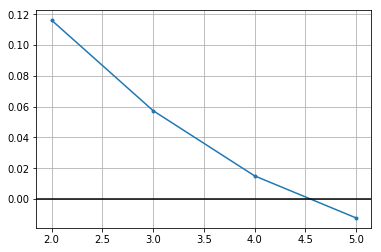

In [90]:
def get_k_mix_acc(k):
    dirichlet_acc = eval_acc(top_docs, claims, n=k, verbose=False)
    lidstone_acc = eval_acc(top_docs_, claims, n=k, verbose=False)
    print(0, dirichlet_acc[0])
    accs = []
    for n in range(0, k - 1):
        tdocs = [top_docs[j][-(1 + (3 - n)):] + top_docs_[j][-(1 + n):] for j in range(len(top_docs))]
        accs.append(eval_acc(tdocs, claims, verbose=False)[0])
        print(n + 1, accs[-1])
    print("i", lidstone_acc[0])
    diff = max(accs) - max(dirichlet_acc[0], lidstone_acc[0])
    print(diff)
    print()
    return diff
y = [get_k_mix_acc(k) for k in range(2, 6)]
plt.plot(range(2, 6), y, marker='.')
plt.axhline(y=0, color="black")
plt.grid()
plt.show()

In [ ]:
# 43 -> 10, 123 -> 30.0

10660 780 78 10.0


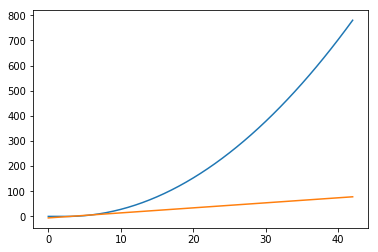

In [35]:
ls = list(range(43))
y = [sum([(l - n) for n in range(3, l)]) for l in ls]
y2 = [((l - 3) * 2) for l in ls]
print(sum(y), max(y), max(y2), max(y) / max(y2))
plt.plot(ls, y)
plt.plot(ls, y2)
plt.show()

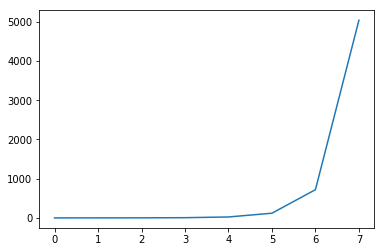

In [12]:
xs = range(0, 8)
# fac_ = lambda n: n * (n - 1) if n > 1 else n
fac_ = lambda n, f: (n * f(n - 1, f)) if n > 1 else n
fac = lambda n: fac_(n, fac_)
ys = [fac(x) for x in xs]
plt.plot(xs, ys)
plt.show()

In [132]:
# similarities = [jm_ll(*wiki[doc_id]) for doc_id in D_ids]
# print("Ranking documents...")
# top_docs = []
# for i in range(N_claims):
#     sims = [(similarities[j][i], D_ids[j]) for j in range(N_docs)]
#     sims.sort()
#     top_docs.append(sims[-5:])
# top_docs_ids = [[s[1] for s in s_] for s_ in top_docs]
# print("Evaluating accuracy...")
# recall = [np.mean([
#     id_ in top_docs_ids[i] for id_ in set([s[2] for s in sum(claims[i]["evidence"], [])])]) \
#                   for i in range(len(claims))]
# np.mean(recall), top_docs

wat defaultdict(<class 'int'>, {'hunger': 0})


ZeroDivisionError: float division by zero

In [88]:
# claims

[{'id': 75397,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
  'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
    [92206, 104971, 'Fox_Broadcasting_Company', 0]]],
  'vocab': defaultdict(int,
              {'nikolaj': 1,
               'costerwaldau': 1,
               'worked': 1,
               'with': 1,
               'the': 1,
               'fox': 1,
               'broadcasting': 1,
               'company': 1})},
 {'id': 150448,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Roman Atwood is a content creator.',
  'evidence': [[[174271, 187498, 'Roman_Atwood', 1]],
   [[174271, 187499, 'Roman_Atwood', 3]]],
  'vocab': defaultdict(int,
              {'roman': 1,
               'atwood': 1,
               'is': 1,
               'a': 1,
               'content': 1,
               'creator': 1})},
 {'id': 214861,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  '

In [13]:
# claim_ids = [75397, 150448, 214861, 156709, 129629, 33078, 6744, 226034, 40190, 76253]
# claims = []
# claims_vocab = set()
# with open(data_dir + "train.jsonl", 'r') as f:
#     a = jsonlines.Reader(f)
#     for a_ in a:
#         if a_["id"] in claim_ids:
#             claims.append(a_)
#             claims[-1]["vocab"] = defaultdict(int)
#             for w in a_["claim"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", ''). \
#               translate(punc_trans).lower().split():
#                 claims[-1]["vocab"][w] += 1
#                 claims_vocab.add(w)

In [15]:
# N_docs = 0
# n_t = defaultdict(int)
# i_ = 0
# for fn in fs:
#     with open(fn, 'r') as f:
#         a = jsonlines.Reader(f)
#         for a_ in a:
#             if a_["id"] == "":
#                 continue
#             N_docs += 1
#             entry = [[w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
#                      '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
#                                  (w.isnumeric() and len(w) > 5))] for l in a_[
#                     "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
#                      len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())]
#             for w in set(sum(entry, [])):
#                 if w in claims_vocab:
#                     n_t[w] += 1
#     i_ += 1
#     sys_print("\r" + str(i_))
# N_docs

109

5416536

In [19]:
# # Load each document and measure cosine similarity
# similarities = {}
# i_ = 0
# for fn in fs:
#     with open(fn, 'r') as f:
#         a = jsonlines.Reader(f)
#         for a_ in a:
#             if a_["id"] == "":
#                 continue
#             doc_tf = defaultdict(int)
#             for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
#                      '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
#                                  (w.isnumeric() and len(w) > 5))] for l in a_[
#                     "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
#                      len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
#                 for w in l:
#                     if w in claims_vocab:
#                         doc_tf[w] += 1
#             doc_tf = {w: doc_tf[w] * np.log(N_docs / n_t[w]) for w in doc_tf}
#             similarities[a_["id"]] = [sum([doc_tf[w] for w in claim["vocab"] if w in doc_tf]) for claim in claims]
#     i_ += 1
#     sys_print("\r" + str(i_))
# similarities = list(similarities.items())

109

In [22]:
# top_docs = []
# for i in range(10):
#     sims = [(s[1][i], s[0]) for s in similarities]
#     sims.sort()
#     top_docs.append(sims[-5:])
# top_docs

[[(566.179224990433, 'List_of_New_Jersey_street_railroads'),
  (579.0265022006889,
   'List_of_early_British_private_locomotive_manufacturers'),
  (580.2826817534418, 'List_of_OMIM_disorder_codes'),
  (920.8325654914589, 'Mottos_and_halls_of_the_Livery_Companies'),
  (1122.7571604226562, 'Pteropodinae')],
 [(236.04509710808153, 'History_of_the_Roman_Constitution'),
  (248.6656867489665, 'List_of_New_Zealand_religious_leaders'),
  (322.341723583277, 'List_of_New_Zealand_Catholic_bishops'),
  (331.034077391518, 'List_of_Catholic_schools_in_New_York'),
  (665.3830074019156, 'History_of_Rome_-LRB-disambiguation-RRB-')],
 [(943.9322647631498, 'Western_literature'),
  (1089.2646242221958, 'List_of_New_Music_America_performances'),
  (1261.5168052555575, 'List_of_national_theatres'),
  (1418.3355392869555, 'List_of_books_by_Jacob_Neusner'),
  (1574.613579602451,
   'List_of_artists_in_the_Philadelphia_Museum_of_Art_handbook_of_the_collections')],
 [(127.08135108472278, 'List_of_This_Is_Daniel

In [26]:
# # Query-likelihood unigram language modelling (unsmoothed)
# def prod(xs):
#     if len(xs) == 0:
#         return 0
#     if len(xs) > 1:
#         return xs[0] * prod(xs[1:])
#     return xs[0]
# likelihoods = {}
# i_ = 0
# for fn in fs:
#     with open(fn, 'r') as f:
#         a = jsonlines.Reader(f)
#         for a_ in a:
#             if a_["id"] == "":
#                 continue
#             doc_M = defaultdict(int)
#             total = 0
#             for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
#                      '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
#                                  (w.isnumeric() and len(w) > 5))] for l in a_[
#                     "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
#                      len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
#                 for w in l:
#                     if w in claims_vocab:
#                         doc_M[w] += 1
#                     total += 1
#             doc_M = {w: doc_M[w] / total for w in doc_M}
#             likelihoods[a_["id"]] = [prod([doc_M[w] for w in claim["vocab"] if w in doc_M]) for claim in claims]
#     i_ += 1
#     sys_print("\r" + str(i_))
# likelihoods = list(likelihoods.items())

109

In [27]:
# top_docs_us = []
# for i in range(10):
#     sims = [(s[1][i], s[0]) for s in likelihoods]
#     sims.sort()
#     top_docs_us.append(sims[-5:])
# top_docs_us

[[(0.34615384615384615, 'The_Last_of_the_Jedi-COLON-_Against_the_Empire'),
  (0.35714285714285715, 'The_Glitterati_-LRB-album-RRB-'),
  (0.36363636363636365, 'The_Kabeedies_discography'),
  (0.375, 'On_air'),
  (0.38461538461538464, 'Public_holidays_in_the_Bahamas')],
 [(0.2857142857142857, 'List_of_fictional_alien_species-COLON-_A'),
  (0.3157894736842105, 'C30H50O4'),
  (0.3333333333333333, 'List_of_Members_of_the_Canadian_Senate_-LRB-A-RRB-'),
  (0.3333333333333333, 'Purpuric_acid'),
  (0.3333333333333333, 'Reem_-LRB-given_name-RRB-')],
 [(0.40625, 'Portuguese-language_literature'),
  (0.41935483870967744, 'East_Asian_poetry'),
  (0.42857142857142855, 'Arts_by_region'),
  (0.4523809523809524, 'Yugoslav_literature'),
  (0.5, 'Testament_of_Qahat')],
 [(0.25, 'Diosmetinidin'),
  (0.25, 'Ruether'),
  (0.2608695652173913, 'List_of_DC_Comics_characters-COLON-_K'),
  (0.3333333333333333, 'Purpuric_acid'),
  (0.3333333333333333, 'Reem_-LRB-given_name-RRB-')],
 [(0.373134328358209, 'Constitu

In [47]:
# # Import wikipedia dataset document word counts for the claim vocabulary
# wiki = {}
# i_ = 0
# for fn in fs:
#     with open(fn, 'r') as f:
#         a = jsonlines.Reader(f)
#         for a_ in a:
#             if a_["id"] == "":
#                 continue
#             doc_M = defaultdict(int)
#             total = 0
#             for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
#                      '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
#                                  (w.isnumeric() and len(w) > 5))] for l in a_[
#                     "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
#                      len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
#                 for w in l:
#                     if w in claims_vocab:
#                         doc_M[w] += 1
#                     total += 1
#             wiki[a_["id"]] = doc_M, total
#     i_ += 1
#     sys_print("\r" + str(i_))
# N_docs = len(wiki)
# N_docs

5416536

In [49]:

# top_docs_ls

[[(-93.88792155564518, 'Peter_Windsor'),
  (-93.3362426640573, 'Mike_Darnell'),
  (-93.2490523905636, "List_of_Bob's_Burgers_episodes"),
  (-93.14458474306068, 'Jimmy_Hodson'),
  (-92.12060364493253, 'Joel_Cheatwood')],
 [(-71.50651994917307, 'Ríos'),
  (-71.29546258204249, 'Giancarlo_Volpe'),
  (-70.35450291570794, 'List_of_essential_oils'),
  (-67.08361379838946, 'List_of_Latin_legal_terms'),
  (-64.71084161996984, 'List_of_video_game_crowdfunding_projects')],
 [(-212.1720252860265, 'List_of_New_Music_America_performances'),
  (-211.8780699805498, 'Narrative'),
  (-211.516743391354, 'List_of_Guggenheim_Fellowships_awarded_in_1968'),
  (-209.68037646198567, 'Acropolis_Institute_of_Technology_and_Research'),
  (-190.23549854041386, 'History_of_art')],
 [(-60.642762136163455, 'Loni_Love'),
  (-60.63228118073983, 'Jeannie_Mai'),
  (-60.41817178428785, 'Roy_"Royalty"_Hamilton'),
  (-60.251009380271654, 'Tamar_Braxton'),
  (-59.94750735936245, 'Adrienne_Bailon')],
 [(-169.6512907398757, 'L

0.75

In [31]:
# claims

[{'id': 75397,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Nikolaj Coster-Waldau worked with the Fox Broadcasting Company.',
  'evidence': [[[92206, 104971, 'Nikolaj_Coster-Waldau', 7],
    [92206, 104971, 'Fox_Broadcasting_Company', 0]]],
  'vocab': defaultdict(int,
              {'nikolaj': 1,
               'costerwaldau': 1,
               'worked': 1,
               'with': 1,
               'the': 1,
               'fox': 1,
               'broadcasting': 1,
               'company': 1})},
 {'id': 150448,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  'claim': 'Roman Atwood is a content creator.',
  'evidence': [[[174271, 187498, 'Roman_Atwood', 1]],
   [[174271, 187499, 'Roman_Atwood', 3]]],
  'vocab': defaultdict(int,
              {'roman': 1,
               'atwood': 1,
               'is': 1,
               'a': 1,
               'content': 1,
               'creator': 1})},
 {'id': 214861,
  'verifiable': 'VERIFIABLE',
  'label': 'SUPPORTS',
  '